In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/creditcard.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-fraud/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Veri Kümesi Bilgileri:")
df.info()

Veri Kümesi Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

In [5]:
print("Temel İstatistikler:")
print(df.describe())

Temel İstatistikler:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.369007e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.500885e-15 -5.620335e-16  1.149614e-16 -2.426963e-15   
std    1.380247e+00  

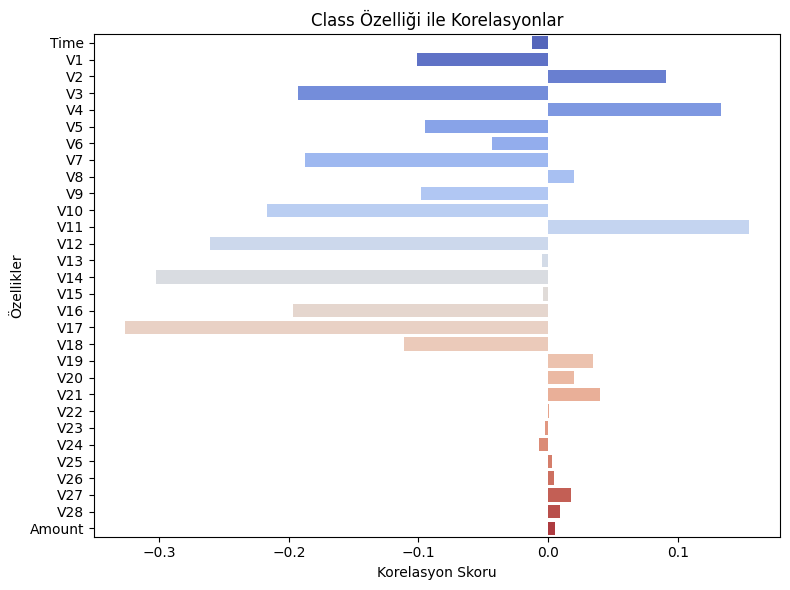

In [6]:
# Korelasyon Matrisi (sadece Class ile olanlar)
correlations = df.corr()['Class'].drop('Class')
plt.figure(figsize=(8,6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title("Class Özelliği ile Korelasyonlar")
plt.xlabel("Korelasyon Skoru")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()

# Sınıf dağılımını görselleştirelim

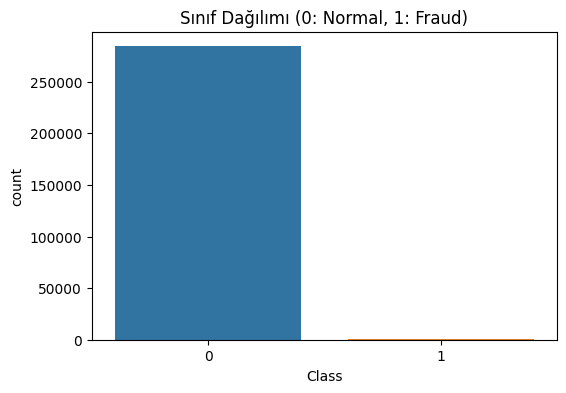

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Sınıf Dağılımı (0: Normal, 1: Fraud)")
plt.show()

In [8]:
print("Orijinal veri sınıf dağılımı:", Counter(df['Class']))

Orijinal veri sınıf dağılımı: Counter({0: 284315, 1: 492})


# Veri dengesizliğinin model performansına etkisi


Veri dengesizliği problemi: Veri setinde fraud işlemler çok az olduğu için model çoğunluk sınıfını öğrenir ve dolandırıcılık işlemlerini tahmin etmekte başarısız olabilir.

In [9]:
methods = pd.DataFrame({
    "Yöntem": ["Oversampling (SMOTE)", "Undersampling (Random Under Sampling)", "Class Weighting", "Anomaly Detection"],
    "Avantajları": ["Azınlık sınıf örnek sayısını artırır", "Çoğunluk sınıf örnek sayısını azaltır", "Model eğitiminde ağırlık kullanır", "Dolandırıcılık işlemlerini anomali olarak ele alır"],
    "Dezavantajları": ["Aşırı uyum riski", "Bilgi kaybı yaşanabilir", "Ağırlık ayarı zor olabilir", "Hassas metrikler gerektirir"]
})
print(methods)


                                  Yöntem  \
0                   Oversampling (SMOTE)   
1  Undersampling (Random Under Sampling)   
2                        Class Weighting   
3                      Anomaly Detection   

                                         Avantajları  \
0               Azınlık sınıf örnek sayısını artırır   
1              Çoğunluk sınıf örnek sayısını azaltır   
2                  Model eğitiminde ağırlık kullanır   
3  Dolandırıcılık işlemlerini anomali olarak ele ...   

                Dezavantajları  
0             Aşırı uyum riski  
1      Bilgi kaybı yaşanabilir  
2   Ağırlık ayarı zor olabilir  
3  Hassas metrikler gerektirir  


# Time-based pattern analizi

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


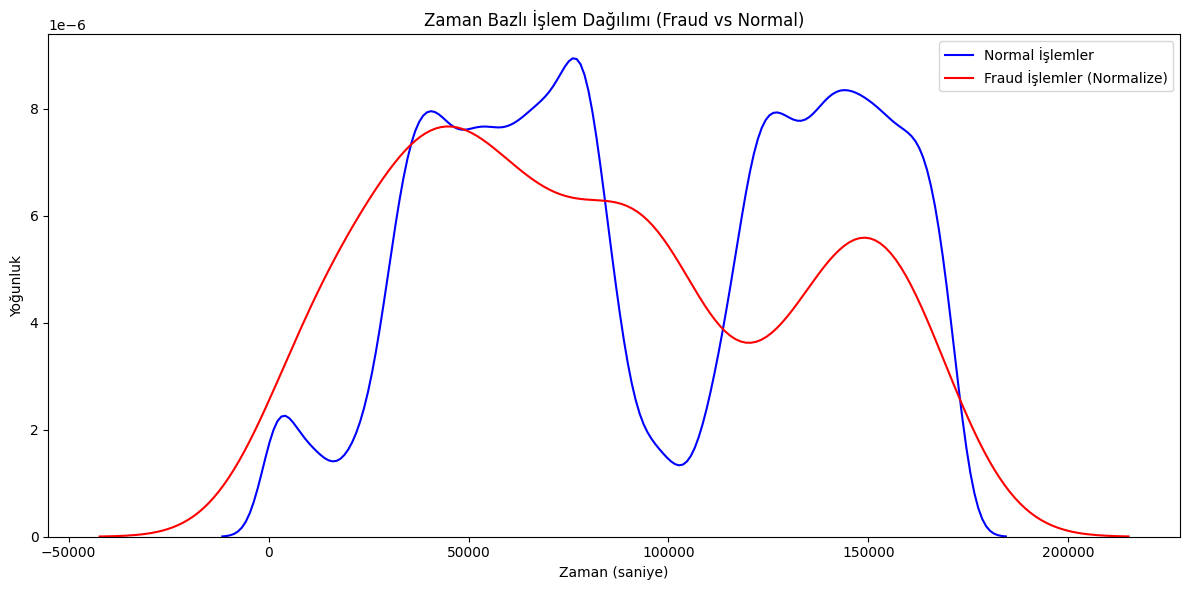

In [10]:
plt.figure(figsize=(12,6))

# Normal işlemler
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Normal İşlemler', color='blue')

# Fraud işlemler (normalize edilmiş)
fraud_time = df[df['Class'] == 1]['Time']
fraud_time_norm = (fraud_time - fraud_time.min()) / (fraud_time.max() - fraud_time.min()) * df['Time'].max()
sns.kdeplot(fraud_time_norm, label='Fraud İşlemler (Normalize)', color='red')

plt.title("Zaman Bazlı İşlem Dağılımı (Fraud vs Normal)")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Yoğunluk")
plt.legend()
plt.tight_layout()
plt.show()

# Amount-based pattern analizi

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


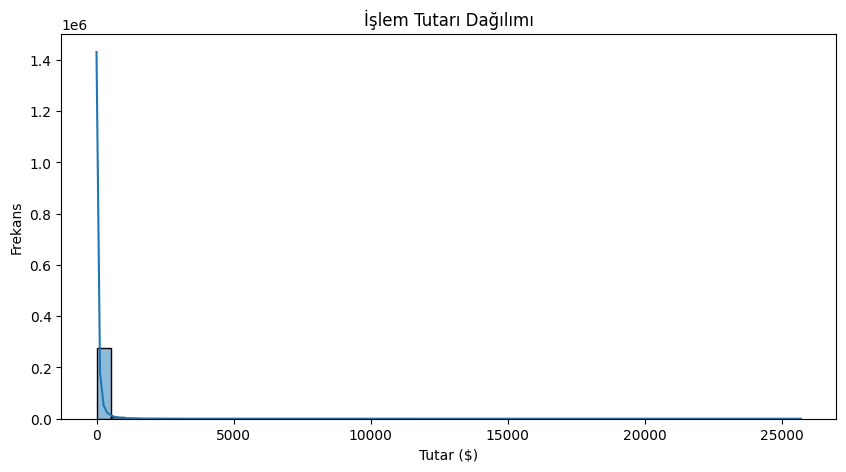

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("İşlem Tutarı Dağılımı")
plt.xlabel("Tutar ($)")
plt.ylabel("Frekans")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


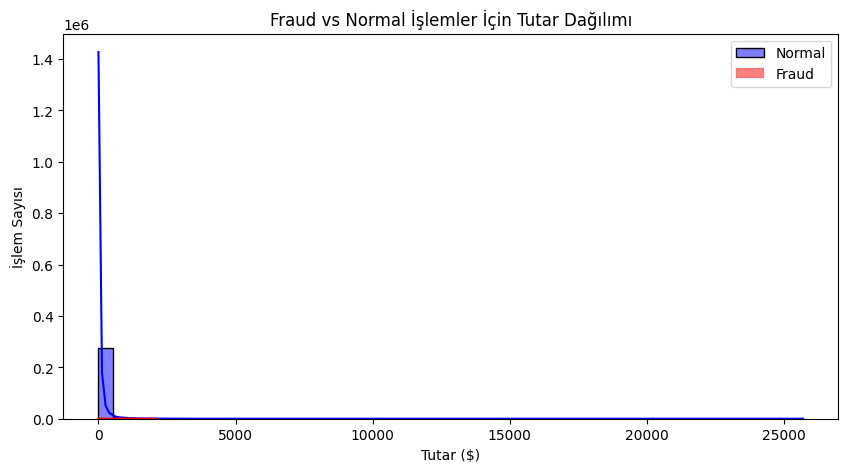

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, label='Normal', color='blue', alpha=0.5)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, label='Fraud', color='red', alpha=0.5)
plt.title("Fraud vs Normal İşlemler İçin Tutar Dağılımı")
plt.xlabel("Tutar ($)")
plt.ylabel("İşlem Sayısı")
plt.legend()
plt.show()

# Veri ölçekleme işlemi (Amount ve Time değişkenlerini standartlaştırıyoruz)

In [13]:
print("Veri Ölçekleme İşlemi Yapılıyor...")
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

Veri Ölçekleme İşlemi Yapılıyor...


In [14]:
# Veriyi bağımsız değişkenler (X) ve hedef değişken (y) olarak ayıralım
X = df.drop(columns=['Class'])
y = df['Class']

In [15]:
# Eğitim ve test setlerine ayırma işlemi
print("Veri Eğitim ve Test Setine Ayrılıyor...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Eğitim verisi boyutu: {X_train.shape}, Test verisi boyutu: {X_test.shape}")


Veri Eğitim ve Test Setine Ayrılıyor...
Eğitim verisi boyutu: (227845, 30), Test verisi boyutu: (56962, 30)


In [16]:
# Cross-validation skorları (modeli fit etmeden önce)
print("Modeller için Cross Validation Accuracy Sonuçları:")
models_cv = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

for name, model in models_cv.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    print(f"{name}: Ortalama Doğruluk = {np.mean(scores):.4f}")

Modeller için Cross Validation Accuracy Sonuçları:


NameError: name 'X_train_smote' is not defined

In [ ]:
# Lojistik Regresyon Modeli
print("Lojistik Regresyon Modeli Eğitiliyor...")
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Lojistik Regresyon Accuracy:", accuracy_score(y_test, y_pred_log))
print("Lojistik Regresyon Classification Report:")
print(classification_report(y_test, y_pred_log))

# Lineer Regresyon (Sınıflandırma için değil, Amount tahmini için kullanabiliriz)
print("Lineer Regresyon Modeli Eğitiliyor...")
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
print("Lineer Regresyon Tahmini İlk 5:", y_pred_lin[:5])

In [ ]:
# Oversampling yöntemi (SMOTE kullanımı ile azınlık sınıfı artırıyoruz)
print("SMOTE ile Azınlık Sınıfı Arttırılıyor...")
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("SMOTE Sonrası Sınıf Dağılımı:", Counter(y_train_smote))

In [ ]:
# Undersampling yöntemi (Random Under Sampling ile çoğunluk sınıfı azaltıyoruz)
print("Random Under Sampling ile Çoğunluk Sınıfı Azaltılıyor...")
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("Under Sampling Sonrası Sınıf Dağılımı:", Counter(y_train_rus))


In [ ]:
# Decision Tree Modeli
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
evaluate_and_print("Decision Tree", dt_model)


In [ ]:
# XGBoost Modeli
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
evaluate_and_print("XGBoost", xgb_model)


In [ ]:
# Neural Network Modeli
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train_smote, y_train_smote)
evaluate_and_print("Neural Network", nn_model)

In [ ]:
# Model eğitimi (Random Forest Classifier)
print("Random Forest Modeli Eğitiliyor...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

ROC Curve, modelin pozitif sınıfları ne kadar iyi ayırt edebildiğini gösteren bir metriktir. ROC eğrisi, False Positive Rate (Yanlış Pozitif Oranı) ile True Positive Rate (Doğru Pozitif Oranı) arasındaki ilişkiyi gösterir.Eğrinin altındaki alan (AUC - Area Under Curve) değeri 1'e ne kadar yakınsa, modelin o kadar iyi bir performans gösterdiğini ifade eder.

Eğer ROC eğrisi (0,1) noktasına ne kadar yakın bir şekilde ilerliyorsa, modelin iyi bir ayırt edici gücü olduğunu söyleyebiliriz.

AUC değeri 0.5’e yakın olursa, modelin rastgele tahmin yapmaktan farksız olduğu anlamına gelir.

Elde edilen AUC değeri yüksekse (0.90 ve üzeri) modelin başarılı olduğu söylenebilir.

In [ ]:
# Tüm modelleri test seti üzerinde değerlendir
print("\nTüm Modellerin Test Verisi Üzerindeki Performansları:")
def evaluate_and_print(model_name, model):
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performansı:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # Confusion matrix görselleştirme
    plt.figure(figsize=(5,5))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ROC Curve çizimi
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0,1], [0,1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend()
        plt.tight_layout()
        plt.show()



In [ ]:
models_test = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

for name, model in models_test.items():
    evaluate_and_print(name, model)